In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time
from scipy.constants import c
from scipy.optimize import curve_fit

#%matplotlib qt

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.facecolor'] = 'w'

In [2]:
f_carrier = 8431016531.832977+37.5

In [3]:
data = np.fromfile('/home/scott/Dropbox/satobs/tianwen1/orbit1/all.dat', sep = ' ').reshape((-1,4))
t_data = Time(data[:,0], format = 'mjd')
freq_data = data[:,1]

In [4]:
gmd_file = '/home/scott/code/GMAT/R2020a/output/ve7til_orbit1.gmd'
gmd_mjd = []
gmd_rangerate = []
with open(gmd_file) as f:
    for l in f.readlines()[2:]:
        gmd_mjd.append(float(l.split()[0]))
        gmd_rangerate.append(float(l.split()[-1]))
gmd_mjd = np.array(gmd_mjd)
gmd_rangerate = np.array(gmd_rangerate)
t_gmd = Time(gmd_mjd + (2430000.0 - 2400000.5), scale = 'tai', format = 'mjd')

In [5]:
rangerate_interp = np.interp(t_data.utc.mjd, t_gmd.utc.mjd, gmd_rangerate)
freq_gmat = f_carrier * (1 - 1e3*rangerate_interp/c) 

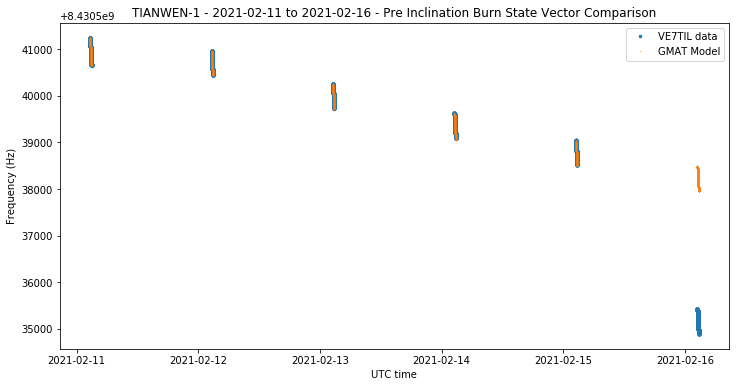

In [25]:
plt.plot(t_data.datetime,freq_data,'.' ,markersize=5, alpha=1, label = 'VE7TIL data')
plt.plot(t_data.datetime, freq_gmat, '.',markersize=.5,alpha=1,label = 'GMAT Model')
plt.title('TIANWEN-1 - %s to %s - Pre Inclination Burn State Vector Comparison'%(t_data.datetime[0].strftime('%Y-%m-%d'), t_data.datetime[len(freq_data)-1].strftime('%Y-%m-%d')))
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.legend()
plt.show();

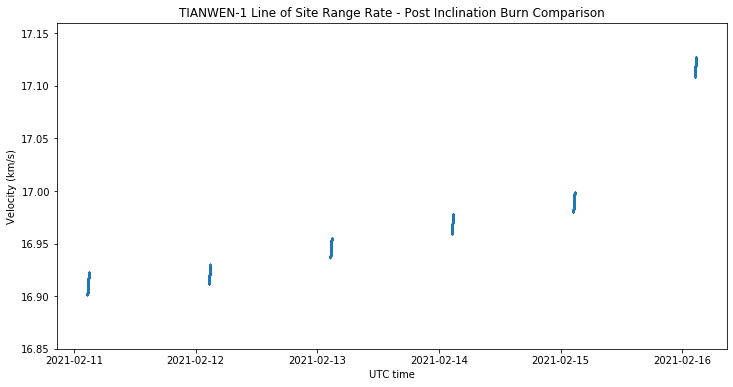

In [26]:
Rr = (c * ((freq_data / f_carrier) -1))/-1000
plt.ylim(16.85,17.16)
plt.plot(t_data.datetime, Rr,'.',markersize=1,  label = 'strf file')
plt.title('TIANWEN-1 Line of Site Range Rate - Post Inclination Burn Comparison')
plt.ylabel('Velocity (km/s)')
plt.xlabel('UTC time')
plt.show();


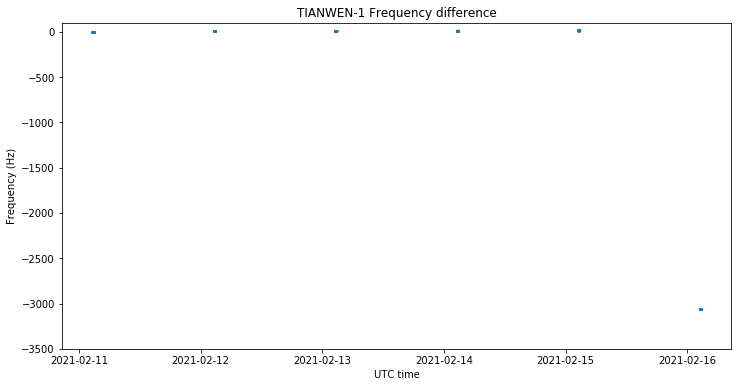

In [10]:
plt.ylim(-3500,100)
plt.plot(t_data.datetime, freq_data - freq_gmat,'.',markersize=1,  label = 'strf file')
plt.title('TIANWEN-1 Frequency difference')
plt.ylabel('Frequency (Hz)')
plt.xlabel('UTC time')
plt.show();
